In [1]:
import jerel
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table, Column
from marvin import config

config.setRelease('DR16')
config.setDR('DR16')
config.download = True

import random

import warnings 
warnings.filterwarnings("ignore")

with fits.open('./data/galaxies_sorted.fits') as hdulist:
    plateifu_list = hdulist[1].data['plateifu']

[INFO]: No release version set. Setting default to DR15


In [ ]:
for i in range(23):
    plateifu = plateifu_list[i]
    test_map_ha,snr,er = jerel.my_ha(plateifu=plateifu)
    test_map_hb,snr,er = jerel.my_hb(plateifu=plateifu)
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(np.log10(test_map_ha),origin='lower')
    axs[1].imshow(np.log10(test_map_hb),origin='lower')

In [ ]:
test_map,snr,er = jerel.sfr(plateifu=plateifu_list[21])

radii_mask = 1*(er < 1.5)

holes = test_map.filled(fill_value=-99)
holes = holes != -99
holes = radii_mask-holes
test_map[holes==1]=np.nan

plt.imshow(test_map,origin='lower')
plt.colorbar()

In [ ]:
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans

# Load the data from data.astropy.org


# We smooth with a Gaussian kernel with x_stddev=1 (and y_stddev=1)
# It is a 9x9 array
kernel = Gaussian2DKernel(x_stddev=1)

# create a "fixed" image with NaNs replaced by interpolated values
fixed_image = interpolate_replace_nans(test_map, kernel)

plt.imshow(fixed_image,origin='lower')
plt.colorbar()

In [ ]:
test_map,snr,er = jerel.sfr(plateifu=plateifu_list[21])

np.sum(fixed_image.filled(fill_value=0))

In [ ]:
(image >0)[35:42,62:70]

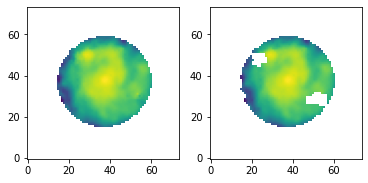

In [2]:
import jerelh
sfr_map, snr_map, er_map = jerelh.sfr_noholes(plateifu_list[16], 2, 1.5)
sfr_map_h, snr_map, er_map = jerelh.sfr(plateifu_list[16], 2, 1.5)
fig, axs = plt.subplots(1,2)
axs[0].imshow(np.log10(sfr_map),origin='lower')
axs[1].imshow(np.log10(sfr_map_h),origin='lower')

In [6]:
np.ma.sum(sfr_map)-np.ma.sum(sfr_map_h)

0.7042485312538957

In [13]:
%%time
tt = jerelh.stat_list(plateifu_list, np.zeros(np.shape(plateifu_list), dtype='int'))

CPU times: user 19.2 s, sys: 262 ms, total: 19.5 s
Wall time: 19.6 s


In [8]:
t

num,ifu_id,d_angle,l_area,t_area,l_sum,t_sum,l_error,t_error,l_median,t_median,asy
int64,str11,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
0,8944-6101,0,89,91,3.1266603653623423e+38,2.0134581772203967e+38,7.151409049447978e+35,6.3528819997870615e+35,2.8928550468918882e+38,1.748265411631931e+38,0.3095700693541674
1,8934-3701,0,158,135,3.0557341517805085e+38,3.3918066619636815e+38,1.682897938196073e+35,2.005929654946973e+35,1.2186034008658833e+38,1.9582059030546782e+38,0.5738319045726029
2,8932-12701,0,1302,1207,6.283780226029147e+37,3.1520354338698435e+37,6.271935427446262e+34,5.895264734014079e+34,5.350013823381787e+37,2.2082163526290675e+37,0.45386713280235247
3,9876-3702,0,160,159,2.6300266166048015e+38,2.0312361578603418e+38,2.5232897218395984e+35,2.3104476917983007e+35,2.1162834343809836e+38,1.2383210368098925e+38,0.3287684636430037
4,8932-3701,0,239,239,3.8453928078444956e+38,3.181345933175231e+38,2.7579507276761566e+35,2.5348735450606558e+35,2.842427628842237e+38,2.653274971546412e+38,0.2711269303539621
5,8950-12705,0,160,275,4.872244519561561e+37,4.672476828651599e+37,2.776539328971899e+35,2.0313471036461967e+35,4.638748077494639e+37,4.1105570008442597e+37,0.29892245174619825
6,8950-1901,0,67,66,1.4047775991226192e+38,1.961178581575655e+38,4.479893192729971e+35,4.858919160972257e+35,1.4030747907621028e+38,2.0437083600530826e+38,0.1557843678754877
7,8931-3703,0,150,164,5.791066025860786e+37,5.4027922164202e+37,1.7473424887848325e+35,1.6134835433468384e+35,3.6239008193163924e+37,4.0111714775414233e+37,0.14809471440523986
8,9876-3703,0,231,222,3.207897522172448e+37,4.201811113815908e+37,6.521348028055423e+34,7.162498487956524e+34,1.5874206133014717e+37,2.3179785144299466e+37,0.2449694179530473


In [12]:
tt

num,ifu_id,d_angle,l_area,t_area,l_sum,t_sum,l_error,t_error,l_median,t_median,asy,area_re,sfr_re,sfr_tot,area_used
int64,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,8944-6101,0,89.0,91.0,0.020255109328805657,0.011391369368633927,1.7443031261466254e-05,1.3649768834546769e-05,0.01871425132835809,0.01025564078292714,0.3354955058284942,203.0,0.8265496082847337,1.1878683421184675,203.0
1,8934-3701,0,158.0,138.0,0.019834027849131786,0.021030853033348396,4.695488534778956e-06,5.268612933149976e-06,0.010035609567494868,0.012179898946246465,0.595705283143761,321.0,1.7347331598394558,1.8217902270447004,321.0
2,8932-12701,0,1360.0,1360.0,0.003384209350513973,nan,1.1159194938909324e-06,9.673534141825841e-07,0.0029990749935886797,nan,nan,2775.0,nan,1.8056344802325155,2775.0
3,9876-3702,0,160.0,159.0,0.016566005464306005,0.018182561080019664,6.2920286275669105e-06,7.83013647542591e-06,0.012450402178941514,0.009051975955697393,0.2505285530306671,340.0,1.535393627108375,1.6580971151674881,340.0
4,8932-3701,0,239.0,239.0,0.02396183111234653,0.018188398315301467,6.497870870806e-06,5.4959414922325465e-06,0.019718998099908902,0.015533740710694145,0.2324767197761534,507.0,2.756277807703638,3.1692832670769313,507.0
5,8950-12705,0,294.0,295.0,nan,0.005299998311471783,2.7387435667359364e-05,6.871984210058037e-06,nan,0.004170286336900322,nan,602.0,nan,0.8041680690665061,602.0
6,8950-1901,0,67.0,66.0,0.025040287128557333,0.030668013994699116,2.35527338292651e-05,2.3651772659933855e-05,0.021689968279398567,0.0302531241404059,0.1720376613290293,144.0,1.0406235688344998,1.2939686401277721,144.0
7,8931-3703,0,165.0,164.0,0.0031190771998032786,0.0034483321089608414,3.6832055583408674e-06,3.273095370518659e-06,0.001615169615493118,0.002495312206490351,0.18707285333545254,354.0,0.30895898859086246,0.3226789332359892,354.0
8,9876-3703,0,231.0,232.0,0.001773593336805519,0.002113636187774234,1.2626151685484972e-06,1.3216220118539372e-06,0.0008669710533803644,0.0009290730511947439,0.25993285395692545,490.0,0.2559908705950725,0.2652384353364746,490.0
